In [9]:
import pandas as pd
import zipfile
import os # Import the os module

zip_path = "/content/sanad_dataset.zip"
extracted_dir = "sanad_extracted" # Define the extraction directory

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("الملفات داخل الملف المضغوط:")
    zip_ref.printdir()

    zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory to find the CSV file name
print(f"\nContents of {extracted_dir}:")
for item in os.listdir(extracted_dir):
    print(item)

csv_file_path = os.path.join(extracted_dir, 'sanad_dataset.csv')

# Check if the CSV file exists before trying to read it
if os.path.exists(csv_file_path):
    df = pd.read_csv(csv_file_path)

    print(df.head())

    print(df.columns)

    # عدد الفئات (التصنيفات)
    print("عدد الفئات:", df['label'].nunique())
    print("توزيع الفئات:\n", df['label'].value_counts())
else:
    print(f"Error: CSV file not found at {csv_file_path}. Please check the extracted directory contents.")

Streaming output truncated to the last 5000 lines.
Tech/1510.txt                                  2020-08-06 11:17:32         3199
Tech/1511.txt                                  2020-08-06 11:17:32         3896
Tech/1512.txt                                  2020-08-06 11:17:32          954
Tech/1513.txt                                  2020-08-06 11:17:32          777
Tech/1514.txt                                  2020-08-06 11:17:32         2665
Tech/1515.txt                                  2020-08-06 11:17:32         2357
Tech/1516.txt                                  2020-08-06 11:17:32         2587
Tech/1517.txt                                  2020-08-06 11:17:32         3342
Tech/1518.txt                                  2020-08-06 11:17:32         1230
Tech/1519.txt                                  2020-08-06 11:17:32         1318
Tech/1520.txt                                  2020-08-06 11:17:32         2016
Tech/1521.txt                                  2020-08-06 11:17:32   

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'أب', 'أخ', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إم', 'ات', 'اتان', 'ارتد', 'ان', 'انفك', 'برح', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'سيما', 'صه', 'ظل', 'ظن', 'عد', 'قط', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


 Classification report:
              precision    recall  f1-score   support

     Culture       0.97      0.97      0.97      1262
     Finance       0.98      0.98      0.98      1333
     Medical       0.97      0.99      0.98      1285
    Politics       0.97      0.98      0.98      1313
    Religion       0.97      0.95      0.96      1256
      Sports       1.00      0.99      0.99      1323
        Tech       0.98      0.98      0.98      1328

    accuracy                           0.98      9100
   macro avg       0.98      0.98      0.98      9100
weighted avg       0.98      0.98      0.98      9100



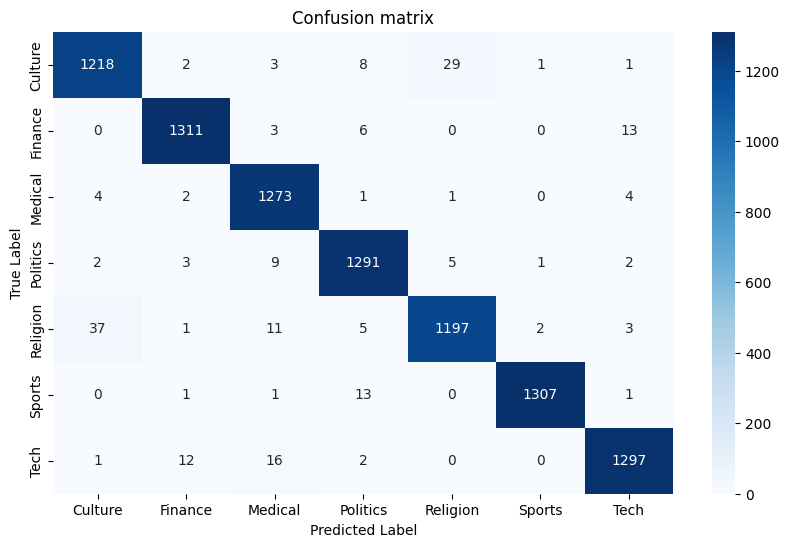

In [14]:
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

try:
    nltk.data.find('corpora/stopwords')
except LookupError: # Correctly catch the LookupError for missing resources
    nltk.download('stopwords')

from nltk.corpus import stopwords

#  الخطوة 2: تحويل النصوص إلى تمثيل عددي باستخدام TF-IDF
# Load Arabic stop words from nltk
arabic_stop_words = stopwords.words('arabic')

# Pass the list of Arabic stop words to TfidfVectorizer
# Ensure TfidfVectorizer is imported from sklearn.feature_extraction.text
vectorizer = TfidfVectorizer(max_features=5000, stop_words=arabic_stop_words)
X = vectorizer.fit_transform(df['text'])
y = df['label']

# الخطوة 3: تقسيم البيانات (80% تدريب، 20% اختبار)
# Ensure train_test_split is imported from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  الخطوة 4: تدريب نموذج Logistic Regression
# Ensure LogisticRegression is imported from sklearn.linear_model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  الخطوة 5: التقييم
y_pred = model.predict(X_test)

# Ensure classification_report and confusion_matrix are imported from sklearn.metrics
print(" Classification report:")
print(classification_report(y_test, y_pred))

#  رسم مصفوفة الالتباس
# Ensure seaborn and matplotlib.pyplot are imported
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion matrix")
plt.show()


Naive Bayes Classification Report:
              precision    recall  f1-score   support

     Culture       0.92      0.95      0.94      1262
     Finance       0.99      0.93      0.96      1333
     Medical       0.93      0.99      0.96      1285
    Politics       0.97      0.97      0.97      1313
    Religion       0.96      0.89      0.92      1256
      Sports       1.00      0.98      0.99      1323
        Tech       0.93      0.97      0.95      1328

    accuracy                           0.96      9100
   macro avg       0.96      0.96      0.96      9100
weighted avg       0.96      0.96      0.96      9100



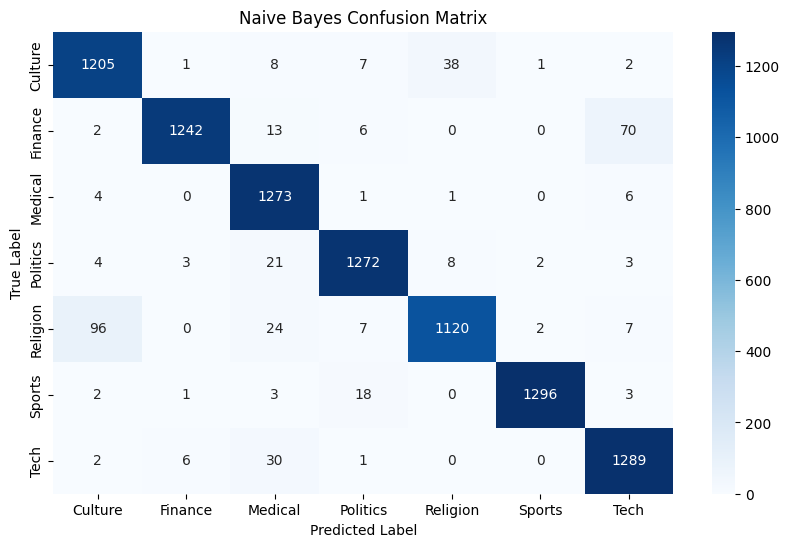

In [15]:
from sklearn.naive_bayes import MultinomialNB

# الخطوة 4: تدريب نموذج Naive Bayes
# Ensure MultinomialNB is imported from sklearn.naive_bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

#  الخطوة 5: التقييم
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

#  رسم مصفوفة الالتباس لـ Naive Bayes
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d',
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Naive Bayes Confusion Matrix")
plt.show()



Decision Tree Classification Report:
              precision    recall  f1-score   support

     Culture       0.83      0.81      0.82      1262
     Finance       0.91      0.93      0.92      1333
     Medical       0.87      0.89      0.88      1285
    Politics       0.85      0.86      0.86      1313
    Religion       0.84      0.85      0.85      1256
      Sports       0.96      0.93      0.95      1323
        Tech       0.87      0.86      0.87      1328

    accuracy                           0.88      9100
   macro avg       0.88      0.88      0.88      9100
weighted avg       0.88      0.88      0.88      9100



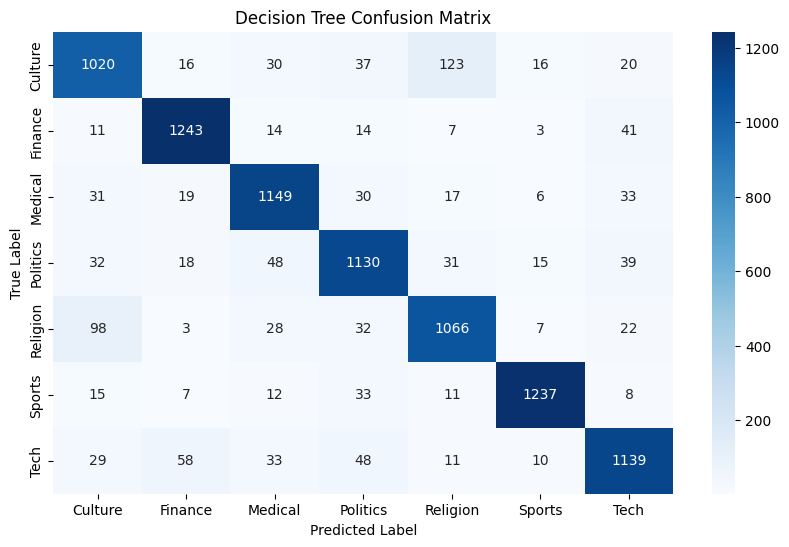

In [16]:
from sklearn.tree import DecisionTreeClassifier

#  الخطوة 4: تدريب نموذج Decision Tree
# Ensure DecisionTreeClassifier is imported from sklearn.tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#  الخطوة 5: التقييم
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

#  رسم مصفوفة الالتباس لـ Decision Tree
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d',
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

     Culture       0.93      0.97      0.95      1262
     Finance       0.98      0.97      0.98      1333
     Medical       0.95      0.98      0.97      1285
    Politics       0.96      0.97      0.96      1313
    Religion       0.98      0.91      0.94      1256
      Sports       0.99      0.98      0.99      1323
        Tech       0.96      0.97      0.96      1328

    accuracy                           0.96      9100
   macro avg       0.96      0.96      0.96      9100
weighted avg       0.96      0.96      0.96      9100



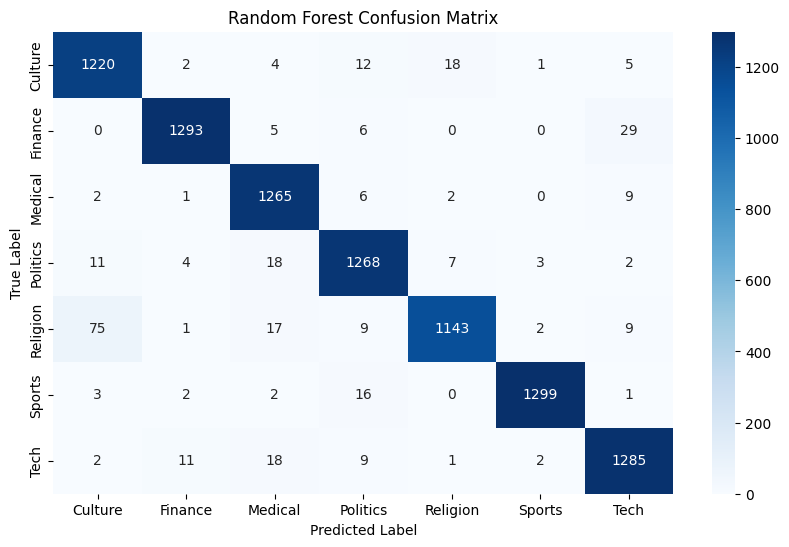

In [17]:
from sklearn.ensemble import RandomForestClassifier

#  الخطوة 4: تدريب نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  الخطوة 5: التقييم
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

#  رسم مصفوفة الالتباس لـ Random Forest
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d',
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate each model and store metrics
models = {
    "Logistic Regression": (model, y_pred),
    "Naive Bayes": (nb_model, y_pred_nb),
    "Decision Tree": (dt_model, y_pred_dt),
    "Random Forest": (rf_model, y_pred_rf)
}

results = {}

for name, (clf, y_predicted) in models.items():
  accuracy = accuracy_score(y_test, y_predicted)
  # Calculate weighted average for precision, recall, and f1-score for multiclass
  precision = precision_score(y_test, y_predicted, average='weighted', zero_division=1)
  recall = recall_score(y_test, y_predicted, average='weighted', zero_division=1)
  f1 = f1_score(y_test, y_predicted, average='weighted', zero_division=1)

  results[name] = {
      'Accuracy': accuracy,
      'Precision (weighted)': precision,
      'Recall (weighted)': recall,
      'F1-Score (weighted)': f1
  }

# Display the comparison
print("\n--- Model Comparison ---")
for name, metrics in results.items():
  print(f"\n{name}:")
  for metric_name, value in metrics.items():
    print(f"  {metric_name}: {value:.4f}")

# You can also create a pandas DataFrame for a more organized comparison
results_df = pd.DataFrame(results).T
print("\nComparison Table:")
print(results_df)

# Find the best model based on a specific metric (F1-Score)
best_model_name = results_df['F1-Score (weighted)'].idxmax()
print(f"\nBest model based on weighted F1-Score: {best_model_name}")



--- Model Comparison ---

Logistic Regression:
  Accuracy: 0.9774
  Precision (weighted): 0.9774
  Recall (weighted): 0.9774
  F1-Score (weighted): 0.9774

Naive Bayes:
  Accuracy: 0.9557
  Precision (weighted): 0.9568
  Recall (weighted): 0.9557
  F1-Score (weighted): 0.9557

Decision Tree:
  Accuracy: 0.8774
  Precision (weighted): 0.8774
  Recall (weighted): 0.8774
  F1-Score (weighted): 0.8773

Random Forest:
  Accuracy: 0.9641
  Precision (weighted): 0.9645
  Recall (weighted): 0.9641
  F1-Score (weighted): 0.9640

Comparison Table:
                     Accuracy  Precision (weighted)  Recall (weighted)  \
Logistic Regression  0.977363              0.977417           0.977363   
Naive Bayes          0.955714              0.956784           0.955714   
Decision Tree        0.877363              0.877418           0.877363   
Random Forest        0.964066              0.964545           0.964066   

                     F1-Score (weighted)  
Logistic Regression             0.977350 